# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [52]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [53]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

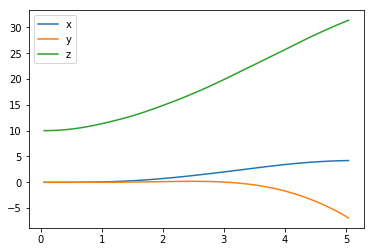

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

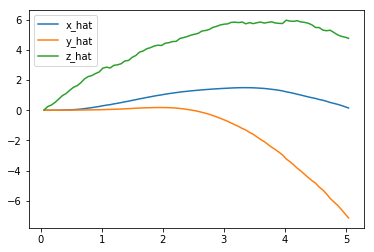

In [55]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

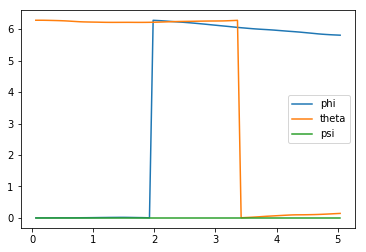

In [56]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

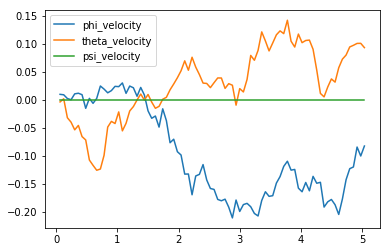

In [57]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

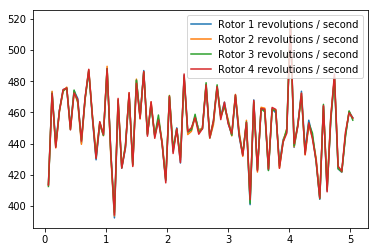

In [58]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [59]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[  4.20855726  -6.89903766  31.38737271   5.80787925   0.14330103   0.        ]
[ 0.15099775 -7.13636446  4.76727715]
[-0.08191965  0.09372516  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [60]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -0.254 (best =  -0.061), noise_scale = 3.2555

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [63]:
#agent
import sys
import pandas as pd
from agents.actorCritic import Actor
from agents.ddpg import DDPG
import math

from task import landing

num_episodes = 1000
#landing 
target_pos = np.array([0., 0., 0.])#landing 
init_pose = np.array([0.,0.,10., 0., 0., 0.]) #initial pose only consider height

task = landing(target_pos=target_pos, init_pose=init_pose)
agent = DDPG(task) 
top_reward = -10000
top_episode_reward = 0
total = 0

labels = ['episode','cummulative']
results = {x : [] for x in labels}
for i_episode in range(1, num_episodes+1):
    #start of episode - reset state
    state = agent.reset_episode() 
    #top_episode_reward = -10000
    total = 0
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        total += reward
        if reward > top_episode_reward:
            top_episode_reward = reward
        if done:
            if top_episode_reward > top_reward:
                top_reward = top_episode_reward
            to_write = [i_episode] + [total]
            for ii in range(len(labels)):
                results[labels[ii]].append(to_write[ii])
            print("\rEpisode = {:4d} Reward = {:4f} Best Reward = {:4f} Total Reward = {:4f} \n".format(i_episode, top_episode_reward, top_reward, total), task.poseLanding(), "\n", end="")
           
            break
    sys.stdout.flush()

Episode =    1 Reward = 1.262670 Best Reward = 1.262670 Total Reward = 21.624477 
 [-7.38979645 -0.47864609  0.          0.78579179  2.6548684   0.        ] 
Episode =    2 Reward = 1.262670 Best Reward = 1.262670 Total Reward = 16.725015 
 [-7.3755776   3.78034987  0.          0.77817197  5.90450409  0.        ] 
Episode =    3 Reward = 1.262670 Best Reward = 1.262670 Total Reward = 18.941095 
 [-7.09261098  1.01718657  0.          2.51397433  2.1017098   0.        ] 
Episode =    4 Reward = 1.262670 Best Reward = 1.262670 Total Reward = -59.234871 
 [ -5.2691012   29.77949034   0.           4.37617729   1.42885325   0.        ] 
Episode =    5 Reward = 2.749160 Best Reward = 2.749160 Total Reward = 33.560616 
 [-1.04649523 -0.07029654  0.          0.48461163  3.19162185  0.        ] 
Episode =    6 Reward = 2.749160 Best Reward = 2.749160 Total Reward = -920.534884 
 [  26.44419274   -3.34149495  138.47066511    6.12692122    0.77420889
    0.        ] 
Episode =    7 Reward = 2.7491

Episode =   52 Reward = 2.959822 Best Reward = 2.959822 Total Reward = 30.948375 
 [ 0.23306988  0.01714726  0.          6.26290739  3.75876137  0.        ] 
Episode =   53 Reward = 2.959822 Best Reward = 2.959822 Total Reward = 30.847960 
 [ 0.28230604  0.02496503  0.          6.05782889  3.74419736  0.        ] 
Episode =   54 Reward = 2.959822 Best Reward = 2.959822 Total Reward = 34.326543 
 [-1.9907927  -0.5838104   0.          0.36757116  2.93833098  0.        ] 
Episode =   55 Reward = 2.959822 Best Reward = 2.959822 Total Reward = 30.216934 
 [-2.12471026  0.01698389  0.          6.00509372  1.5087078   0.        ] 
Episode =   56 Reward = 2.959822 Best Reward = 2.959822 Total Reward = -723.384357 
 [-88.5066678   46.48217304   0.           2.55339972   5.49347223   0.        ] 
Episode =   57 Reward = 2.959822 Best Reward = 2.959822 Total Reward = -32.281759 
 [ -3.79648798e-03   2.15266419e+01   0.00000000e+00   4.30756093e+00
   6.37313759e-04   0.00000000e+00] 
Episode =   

Episode =   99 Reward = 2.959822 Best Reward = 2.959822 Total Reward = 28.742729 
 [ 4.24017118 -0.01479187  0.          4.17083901  3.55568907  0.        ] 
Episode =  100 Reward = 2.959822 Best Reward = 2.959822 Total Reward = 10.820294 
 [ 5.11923227  7.15672318  0.          0.79063051  5.17909355  0.        ] 
Episode =  101 Reward = 2.959822 Best Reward = 2.959822 Total Reward = 28.173258 
 [ 4.26521071  0.17311987  0.          4.28072231  1.00730237  0.        ] 
Episode =  102 Reward = 2.959822 Best Reward = 2.959822 Total Reward = 27.107090 
 [ 3.6107497  -0.70965741  0.          5.44841506  4.78520209  0.        ] 
Episode =  103 Reward = 2.959822 Best Reward = 2.959822 Total Reward = 18.893461 
 [ 4.84816535  2.8714607   0.          5.43347279  1.76969097  0.        ] 
Episode =  104 Reward = 2.959822 Best Reward = 2.959822 Total Reward = 28.068250 
 [ 4.28577909  0.20458791  0.          4.86563473  3.78239525  0.        ] 
Episode =  105 Reward = 2.959822 Best Reward = 2.959

Episode =  151 Reward = 2.959822 Best Reward = 2.959822 Total Reward = 25.007206 
 [ 5.4842361  -0.04296998  0.          0.19707888  1.90863646  0.        ] 
Episode =  152 Reward = 2.959822 Best Reward = 2.959822 Total Reward = -1066.424825 
 [-110.0702542    22.24582814   22.38682864    1.2945553     4.22789958
    0.        ] 
Episode =  153 Reward = 2.959822 Best Reward = 2.959822 Total Reward = -679.860035 
 [ 84.32037332   3.74854496   0.           1.60731627   2.66634178   0.        ] 
Episode =  154 Reward = 2.959822 Best Reward = 2.959822 Total Reward = -21.844841 
 [-18.55445886  -0.11027258   0.           0.34818994   1.93669713   0.        ] 
Episode =  155 Reward = 2.959822 Best Reward = 2.959822 Total Reward = 3.339438 
 [-12.52257851   0.33428737   0.           6.2205666    0.72952935   0.        ] 
Episode =  156 Reward = 2.959822 Best Reward = 2.959822 Total Reward = -6.027995 
 [ 16.19194114  -0.1262687    0.           0.18625075   3.64811592   0.        ] 
Episode = 

Episode =  201 Reward = 2.959822 Best Reward = 2.959822 Total Reward = -675.086002 
 [-26.75832786   0.98478925  29.11414539   4.91722992   3.51167871   0.        ] 
Episode =  202 Reward = 2.959822 Best Reward = 2.959822 Total Reward = 28.640595 
 [ -1.56932368e+00   5.49526380e-03   0.00000000e+00   6.22665082e+00
   5.41688944e+00   0.00000000e+00] 
Episode =  203 Reward = 2.959822 Best Reward = 2.959822 Total Reward = 20.153300 
 [-5.5275472   0.02027618  0.          6.16256503  4.88405405  0.        ] 
Episode =  204 Reward = 2.959822 Best Reward = 2.959822 Total Reward = -171.286822 
 [-15.58718748  -0.39322617   0.           5.27524484   4.53667012   0.        ] 
Episode =  205 Reward = 2.959822 Best Reward = 2.959822 Total Reward = 27.283620 
 [-4.8100234   0.01858681  0.          0.10815804  3.72021801  0.        ] 
Episode =  206 Reward = 2.959822 Best Reward = 2.959822 Total Reward = 26.035139 
 [-3.0674034  -0.01570476  0.          0.19049509  3.41300496  0.        ] 
Episo

Episode =  252 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 16.242787 
 [ 0.42644874  0.04579451  0.          6.26398412  0.76616175  0.        ] 
Episode =  253 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 37.815355 
 [-3.21179191  0.29043419  0.          0.23351443  0.8768198   0.        ] 
Episode =  254 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 16.466224 
 [ 0.31465176  0.07677509  0.          6.24160122  0.78881973  0.        ] 
Episode =  255 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 15.990613 
 [-5.77242127  0.03081445  0.          6.2569511   5.7698498   0.        ] 
Episode =  256 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 14.767684 
 [ 6.53369712  0.03768463  0.          6.23699841  1.45254681  0.        ] 
Episode =  257 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 19.718532 
 [ -8.61610265e+00   7.11567864e-03   0.00000000e+00   9.09952898e-02
   2.25685289e+00   0.00000000e+00] 
Episode =  258 Reward

Episode =  301 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 19.579883 
 [-10.8427858   -1.02655151   0.           0.71792648   2.10704913   0.        ] 
Episode =  302 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 18.896766 
 [-3.51913056  0.13795425  0.          6.20046988  0.4521816   0.        ] 
Episode =  303 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 48.057814 
 [ 5.73300291  0.54118406  0.          6.05172149  1.97125135  0.        ] 
Episode =  304 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 57.266972 
 [ 7.66968238  5.55471612  0.          5.71564841  2.60479688  0.        ] 
Episode =  305 Reward = 2.987843 Best Reward = 2.987843 Total Reward = -298.020403 
 [-9.77472216  0.66393323  7.63486328  6.22660703  1.17051568  0.        ] 
Episode =  306 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 46.332295 
 [ 9.72826763 -0.07121041  0.          0.41823445  2.04039668  0.        ] 
Episode =  307 Reward = 2.987843 Best Reward

Episode =  352 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 4.352488 
 [ 18.74095932   3.35820018   0.           5.58242676   1.53945311   0.        ] 
Episode =  353 Reward = 2.987843 Best Reward = 2.987843 Total Reward = -25.451103 
 [ 22.85286304   1.90490958   0.           5.9860315    1.46999583   0.        ] 
Episode =  354 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 24.498364 
 [ 1.92130857  2.07429734  0.          5.98452916  0.91774184  0.        ] 
Episode =  355 Reward = 2.987843 Best Reward = 2.987843 Total Reward = -34.100261 
 [ 23.86226361   2.84203017   0.           5.84539163   1.05757142   0.        ] 
Episode =  356 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 24.458406 
 [  8.50693049e-01  -7.04995847e-05   0.00000000e+00   6.25259008e+00
   4.17022856e+00   0.00000000e+00] 
Episode =  357 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 19.212320 
 [ 2.06003376  0.05103948  0.          6.23514001  1.82859064  0.        ] 
Ep

Episode =  403 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 29.429391 
 [  7.55751130e-01  -2.02923376e-03   0.00000000e+00   1.19996122e-01
   5.75641903e+00   0.00000000e+00] 
Episode =  404 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 27.729920 
 [ -6.46814745e-02  -2.84938277e-03   0.00000000e+00   6.24685239e+00
   6.19497800e+00   0.00000000e+00] 
Episode =  405 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 30.158018 
 [ 0.17704256 -0.01601219  0.          6.18493487  1.78935983  0.        ] 
Episode =  406 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 29.695714 
 [ 0.57130194 -0.02996831  0.          6.11993619  1.27322409  0.        ] 
Episode =  407 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 29.809424 
 [ 0.5569468  -0.02629929  0.          0.08432659  5.73624922  0.        ] 
Episode =  408 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 30.007868 
 [ 0.43200234 -0.01286972  0.          0.02344612  5.70392361  0. 

Episode =  455 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 19.302642 
 [ 0.27450569  6.35786976  0.          4.88446659  3.79871009  0.        ] 
Episode =  456 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 20.762468 
 [ 0.57235455  4.24070013  0.          3.12538551  5.80746974  0.        ] 
Episode =  457 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 20.501512 
 [ 0.26274892  4.67781735  0.          3.17881073  5.70467479  0.        ] 
Episode =  458 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 20.569062 
 [ 0.4052665   4.5127225   0.          3.14160657  5.71351645  0.        ] 
Episode =  459 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 19.595538 
 [ 0.33846655  5.0121354   0.          3.07710757  5.72773032  0.        ] 
Episode =  460 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 20.588267 
 [ 0.43500288  4.45273579  0.          3.15985208  5.74656729  0.        ] 
Episode =  461 Reward = 2.987843 Best Reward = 2.987

Episode =  507 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 20.553189 
 [ 0.14536109  4.80493104  0.          3.17400308  5.66304076  0.        ] 
Episode =  508 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 20.032796 
 [ 0.46044477  4.6738848   0.          3.09823148  5.76860688  0.        ] 
Episode =  509 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 19.915154 
 [ 0.45725516  3.38682146  0.          1.37525059  1.38933046  0.        ] 
Episode =  510 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 21.125842 
 [ 0.54798905  4.07706541  0.          3.21736573  5.759888    0.        ] 
Episode =  511 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 25.015498 
 [ 0.51109367  4.318532    0.          2.41153929  0.01516106  0.        ] 
Episode =  512 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 19.616772 
 [ 0.15850622  5.15376189  0.          3.11801891  5.66951443  0.        ] 
Episode =  513 Reward = 2.987843 Best Reward = 2.987

Episode =  559 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 34.105958 
 [ 0.26554026 -0.03649159  0.          0.2121945   4.25424571  0.        ] 
Episode =  560 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 24.988139 
 [-4.11450549  1.48440401  0.          6.09253528  0.15620103  0.        ] 
Episode =  561 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 2.635447 
 [-5.55963611 -6.34543466  0.          1.12976733  2.33683726  0.        ] 
Episode =  562 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 29.866855 
 [ 0.47314065 -0.11728215  0.          3.41596669  5.71400728  0.        ] 
Episode =  563 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 29.452337 
 [ 0.66213317 -0.29647015  0.          0.12689425  5.73843659  0.        ] 
Episode =  564 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 21.899370 
 [-0.99402476 -4.61662319  0.          5.93764085  1.17488912  0.        ] 
Episode =  565 Reward = 2.987843 Best Reward = 2.9878

Episode =  611 Reward = 2.987843 Best Reward = 2.987843 Total Reward = -909.358408 
 [ 68.19407959 -11.00787784   7.41971856   5.0183688    2.93149654   0.        ] 
Episode =  612 Reward = 2.987843 Best Reward = 2.987843 Total Reward = -24.272278 
 [ 25.13543115   4.42942948   0.           5.16873158   1.24245534   0.        ] 
Episode =  613 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 31.078360 
 [-2.8537994   0.02545206  0.          6.18510711  5.9781639   0.        ] 
Episode =  614 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 21.490809 
 [-6.11217537  0.00749027  0.          0.11315076  3.42286882  0.        ] 
Episode =  615 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 15.741048 
 [-6.9467885  -0.03930867  0.          0.23685605  2.66696765  0.        ] 
Episode =  616 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 31.770488 
 [ -1.29240995e+00  -6.09673606e-03   0.00000000e+00   6.22447243e+00
   3.99144813e+00   0.00000000e+00] 
Episod

Episode =  662 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 29.237941 
 [ 0.79703499 -0.0629412   0.          0.2493863   5.7655657   0.        ] 
Episode =  663 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 29.190112 
 [-0.95085737 -0.02192993  0.          0.21467554  5.43833937  0.        ] 
Episode =  664 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 29.617890 
 [  6.50924974e-01   2.19413580e-03   0.00000000e+00   6.20237905e+00
   5.77005492e+00   0.00000000e+00] 
Episode =  665 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 29.970459 
 [ 0.47338506 -0.02632862  0.          0.05936465  5.72455502  0.        ] 
Episode =  666 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 29.998915 
 [ 0.44117029 -0.03281491  0.          0.06792101  5.70187209  0.        ] 
Episode =  667 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 29.467014 
 [ 0.73110639  0.0248506   0.          6.06879194  5.76006912  0.        ] 
Episode =  668 Reward

Episode =  713 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 29.794187 
 [ 0.57048727 -0.03465885  0.          0.24804247  5.72723514  0.        ] 
Episode =  714 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 25.805540 
 [ -2.69430039e+00   5.61417888e-03   0.00000000e+00   6.09437385e+00
   4.25175560e+00   0.00000000e+00] 
Episode =  715 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 25.104290 
 [ 1.94522959 -0.02083251  0.          0.09141268  4.59267252  0.        ] 
Episode =  716 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 29.522081 
 [ 0.70607513  0.00827295  0.          6.22316618  5.75948965  0.        ] 
Episode =  717 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 25.936859 
 [-1.80889104 -0.01125334  0.          0.04167447  5.24582966  0.        ] 
Episode =  718 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 29.553608 
 [ 0.6885524  -0.01525353  0.          0.11541096  5.74558774  0.        ] 
Episode =  719 Reward

Episode =  763 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 30.088475 
 [ 0.36356954 -0.02121633  0.          0.04445386  5.71088894  0.        ] 
Episode =  764 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 29.819883 
 [  5.47198195e-01   4.99692764e-04   0.00000000e+00   6.28233459e+00
   5.71513519e+00   0.00000000e+00] 
Episode =  765 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 30.428421 
 [ 0.20748761  0.01038532  0.          6.09195421  5.6685121   0.        ] 
Episode =  766 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 30.159813 
 [ 0.38732633  0.01204276  0.          6.12098376  5.70614045  0.        ] 
Episode =  767 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 29.408785 
 [ 0.7480898   0.02327191  0.          6.15726616  5.76521632  0.        ] 
Episode =  768 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 30.539968 
 [ 0.18860372  0.00955147  0.          6.27946294  5.66461644  0.        ] 
Episode =  769 Reward

Episode =  814 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 30.255823 
 [ 0.302498   -0.02307838  0.          0.19908445  5.68445868  0.        ] 
Episode =  815 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 30.750211 
 [ 0.04183537 -0.03213558  0.          0.12519929  5.64881847  0.        ] 
Episode =  816 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 30.833096 
 [-0.09915729  0.02767138  0.          6.01874115  5.60743034  0.        ] 
Episode =  817 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 29.828494 
 [ 0.53914108 -0.03463075  0.          0.23176204  5.70574763  0.        ] 
Episode =  818 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 29.488536 
 [ 0.69942054  0.00975302  0.          6.22942661  5.75315163  0.        ] 
Episode =  819 Reward = 2.987843 Best Reward = 2.987843 Total Reward = 29.654575 
 [ 0.6593684   0.01362137  0.          5.94886881  5.75041975  0.        ] 
Episode =  820 Reward = 2.987843 Best Reward = 2.987

Episode =  864 Reward = 2.993651 Best Reward = 2.993651 Total Reward = 29.659543 
 [ 0.60918959  0.02029433  0.          5.91375429  5.74233654  0.        ] 
Episode =  865 Reward = 2.993651 Best Reward = 2.993651 Total Reward = 29.277272 
 [ 0.81074637  0.01715493  0.          6.22010497  5.77730082  0.        ] 
Episode =  866 Reward = 2.993651 Best Reward = 2.993651 Total Reward = 29.439362 
 [ 0.71220886  0.01646501  0.          6.02474889  5.74311456  0.        ] 
Episode =  867 Reward = 2.993651 Best Reward = 2.993651 Total Reward = 29.396866 
 [ 0.76432938  0.013087    0.          6.07649532  5.75135575  0.        ] 
Episode =  868 Reward = 2.993651 Best Reward = 2.993651 Total Reward = 29.780597 
 [ 0.5737819  -0.04304946  0.          0.33629407  5.73256902  0.        ] 
Episode =  869 Reward = 2.993651 Best Reward = 2.993651 Total Reward = 29.782096 
 [ 0.54371033 -0.02299506  0.          0.12242473  5.72750819  0.        ] 
Episode =  870 Reward = 2.993651 Best Reward = 2.993

Episode =  915 Reward = 2.993651 Best Reward = 2.993651 Total Reward = 30.119886 
 [ 0.35859361 -0.01405713  0.          6.25914506  5.68897105  0.        ] 
Episode =  916 Reward = 2.993651 Best Reward = 2.993651 Total Reward = 29.984256 
 [ 0.44289603  0.02179198  0.          6.17959223  5.71541794  0.        ] 
Episode =  917 Reward = 2.993651 Best Reward = 2.993651 Total Reward = 30.310385 
 [ 0.26273238  0.00929975  0.          6.23906724  5.67378886  0.        ] 
Episode =  918 Reward = 2.993651 Best Reward = 2.993651 Total Reward = 29.797970 
 [ 0.54247264 -0.00804947  0.          0.04158145  5.73518277  0.        ] 
Episode =  919 Reward = 2.993651 Best Reward = 2.993651 Total Reward = 30.148151 
 [ 0.34844213  0.02114042  0.          6.08927049  5.68714217  0.        ] 
Episode =  920 Reward = 2.993651 Best Reward = 2.993651 Total Reward = 30.135251 
 [  3.68463440e-01   3.84098689e-03   0.00000000e+00   6.26951087e+00
   5.70763036e+00   0.00000000e+00] 
Episode =  921 Reward

Episode =  965 Reward = 2.993651 Best Reward = 2.993651 Total Reward = 29.932390 
 [ 0.42986064 -0.03627681  0.          0.17465793  5.69703452  0.        ] 
Episode =  966 Reward = 2.993651 Best Reward = 2.993651 Total Reward = 29.270357 
 [ 0.82580687 -0.0286078   0.          0.09676305  5.76908254  0.        ] 
Episode =  967 Reward = 2.993651 Best Reward = 2.993651 Total Reward = 30.010303 
 [ 0.42687763 -0.01850246  0.          0.01377016  5.6829042   0.        ] 
Episode =  968 Reward = 2.993651 Best Reward = 2.993651 Total Reward = 30.358380 
 [ 0.25805428 -0.00927346  0.          0.15656094  5.67066725  0.        ] 
Episode =  969 Reward = 2.993651 Best Reward = 2.993651 Total Reward = 30.558514 
 [  1.30033948e-01  -9.83798987e-05   0.00000000e+00   6.21773806e+00
   5.63706545e+00   0.00000000e+00] 
Episode =  970 Reward = 2.993651 Best Reward = 2.993651 Total Reward = 30.008938 
 [ 0.4270007  -0.03469198  0.          0.19516943  5.6859232   0.        ] 
Episode =  971 Reward

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

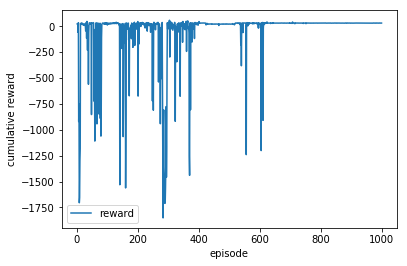

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['episode'], results['cummulative'], label='reward')
plt.xlabel('episode')
plt.ylabel('cumulative reward')
plt.legend()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: The task is to have the quadcopter land. It took a lot of trial and error to design something that at least returned a positive reward. I set it so that only height was considered and I also created a penalty function for the other two velocities so that if they were not 0, it was a penalty (negative reward) but this did not help the score so I removed that. Instead I decreased the weight on the difference between the current and target height and settled on a small reward for the x and y velocities being 0.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**: I only tried DDPG and it took a very long time to work on the parameters and get the total rewards to not be entirely negative. For the neural network I used phi = 0, theta = .075, psi = .3. I used a discount of 0.65 and soft update of 0.02. For the neural network, I had 3 hidden layers and 1 output layer (all used relu activation). For the critic class, I used 4 hidden layers, all relu activation and 1 combined layer.


**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:This was very hard! I had a tough time understanding the problem, but after a while, and going back over the notes, I started to learn more what I was doing, but it's still a challenge. The final performance was not as good as I would have liked, the top reward was 2.993105, and the total reward averaged around 30. 

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:The hardest part of the project was getting started. I didn't really understand the problem and it took a long time to figure out what I was supposed to be doing. But it was a fun experince and it did give more information about how DDPG works.